Logistic Regression Accuracy: 0.9736842105263158
Decision Tree Accuracy: 0.9385964912280702
Random Forest Accuracy: 0.9649122807017544


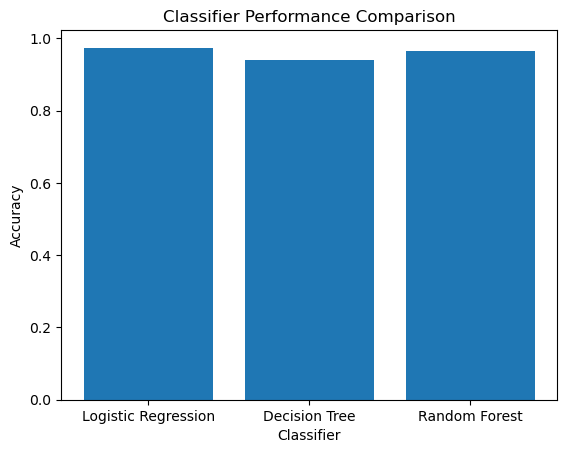

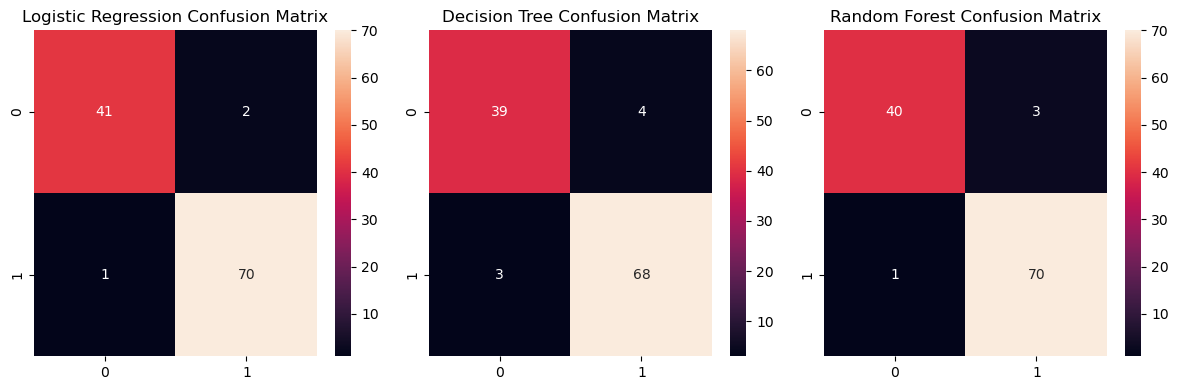

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize or normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
logreg_predictions = logreg.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree.predict(X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree Accuracy:", decision_tree_accuracy)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest.predict(X_test_scaled)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Random Forest Accuracy:", random_forest_accuracy)

# Comparative Analysis Bar Graph
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [logreg_accuracy, decision_tree_accuracy, random_forest_accuracy]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')
plt.show()

# Confusion Matrices
confusion_matrix_logreg = confusion_matrix(y_test, logreg_predictions)
confusion_matrix_decision_tree = confusion_matrix(y_test, decision_tree_predictions)
confusion_matrix_random_forest = confusion_matrix(y_test, random_forest_predictions)

plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(confusion_matrix_logreg, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(132)
sns.heatmap(confusion_matrix_decision_tree, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')

plt.subplot(133)
sns.heatmap(confusion_matrix_random_forest, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()